In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch

# Verificar si CUDA está disponible
cuda_available = torch.cuda.is_available()

# Imprimir si CUDA está disponible y la versión de CUDA
print(f"CUDA disponible: {cuda_available}")

if cuda_available:
    print(f"Versión de CUDA: {torch.version.cuda}")
    print(f"Dispositivo CUDA: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA no está disponible.")


CUDA disponible: True
Versión de CUDA: 12.1
Dispositivo CUDA: Tesla T4


In [ ]:
import os

def contar_imagenes(carpeta):
    # Extensiones comunes de imágenes
    extensiones_imagenes = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    # Contador de imágenes
    contador = 0

    # Recorre los archivos en la carpeta
    for archivo in os.listdir(carpeta):
        if archivo.lower().endswith(extensiones_imagenes):
            contador += 1

    return contador

# Ejemplo de uso
carpeta = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mezcla_1'
numero_imagenes = contar_imagenes(carpeta)
print(f'Número de imágenes en la carpeta: {numero_imagenes}')

Número de imágenes en la carpeta: 500


# **Los datos**

Importamos los datos, que han sido obtenidos tomando fotos a las distintas plantas medicinales asignadas al estudiante: albahaca, tomillo, malva, rúcula, hinojo. En total son 2200 imagenes, 440 de cada planta. Cada imagen tiene un tamaño y resolución de 900 x 800 pixeles. De tal forma que al volverse un tensor se tendrán 21600000 elementos, ya que se multiplica 900* 800 *3 donde 3 representa el número de canales rgb, donde se mantienen todos los colores.

In [ ]:
import os
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
nombres_plantas = {
    'albahacas_recortadas_Albahaca': 0,
    'hojasTomillo_recortadas_tomillo': 1,
    'malvas_recortadas_malva': 2,
    'ruculaRedimensionadas_rucula': 3,
    'zoom_hinojo': 4
}

# Ruta principal donde están las imágenes mezcladas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mezcla_1'

# Ruta para guardar el archivo en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/dataHojas.pkl'

# Lista para almacenar el dataset completo
dataset = []

# Recorrer todos los archivos en la carpeta
for nombre_imagen in os.listdir(ruta_principal):
    imagen_path = os.path.join(ruta_principal, nombre_imagen)

    # Comprobar si el archivo es una imagen
    if nombre_imagen.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Identificar la planta a partir del nombre del archivo
        planta_en_nombre = None
        for clave in nombres_plantas:
            if clave in nombre_imagen:
                planta_en_nombre = nombres_plantas[clave]
                break

        if planta_en_nombre is not None:
            # Cargar la imagen
            imagen = Image.open(imagen_path)

            # Convertir la imagen a un array de NumPy
            imagen_array = np.array(imagen)

            # Añadir el par (imagen_array, etiqueta) al dataset
            dataset.append((imagen_array, planta_en_nombre))

# Guardar el dataset completo usando pickle
with open(ruta_guardado, 'wb') as f:
    pickle.dump(dataset, f)

print(f"Dataset guardado en {ruta_guardado}. Total de imágenes procesadas: {len(dataset)}")

Dataset guardado en /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/Pruebas_dataHojas.pkl. Total de imágenes procesadas: 200


In [ ]:
import os
from PIL import Image
import numpy as np
import pickle

# Definir las rutas de las carpetas y las etiquetas
nombres_plantas = {
    'albahacas_recortadas_Albahaca': 0,
    'hojasTomillo_recortadas_tomillo': 1,
    'malvas_recortadas_malva': 2,
    'ruculaRedimensionadas_rucula': 3,
    'zoom_hinojo': 4
}

# Ruta principal donde están las imágenes mezcladas
ruta_principal = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/pruebas'

# Ruta para guardar los archivos en Google Drive
ruta_guardado = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData'

# Variables para controlar el procesamiento por lotes
lote_tamano = 500
lote_actual = 1
contador_imagenes = 0
dataset = []

# Recorrer todos los archivos en la carpeta
for nombre_imagen in os.listdir(ruta_principal):
    imagen_path = os.path.join(ruta_principal, nombre_imagen)

    # Comprobar si el archivo es una imagen
    if nombre_imagen.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Identificar la planta a partir del nombre del archivo
        planta_en_nombre = None
        for clave in nombres_plantas:
            if clave in nombre_imagen:
                planta_en_nombre = nombres_plantas[clave]
                break

        if planta_en_nombre is not None:
            # Cargar la imagen
            imagen = Image.open(imagen_path)

            # Convertir la imagen a un array de NumPy
            imagen_array = np.array(imagen)

            # Añadir el par (imagen_array, etiqueta) al dataset
            dataset.append((imagen_array, planta_en_nombre))
            contador_imagenes += 1

            # Si alcanzamos el tamaño del lote, guardar y liberar memoria
            if contador_imagenes == lote_tamano:
                # Guardar el dataset usando pickle
                with open(ruta_guardado + f'TestDataHojas_{lote_actual}.pkl', 'wb') as f:
                    pickle.dump(dataset, f)

                # Liberar memoria
                dataset = []
                contador_imagenes = 0
                lote_actual += 1

# Guardar el último lote si queda algo en el dataset
if len(dataset) > 0:
    with open(ruta_guardado + f'dataHojas_{lote_actual}.pkl', 'wb') as f:
        pickle.dump(dataset, f)

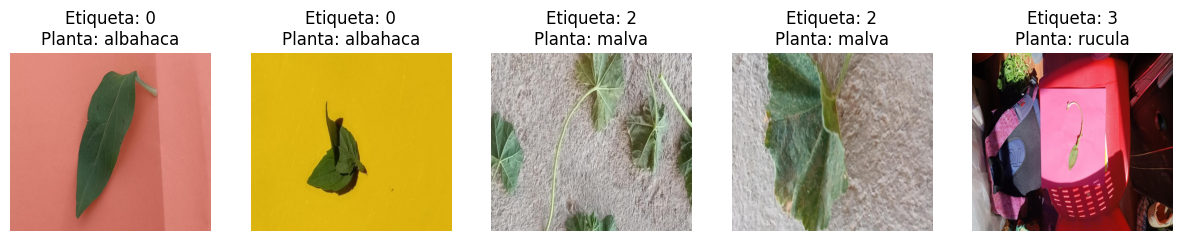

In [ ]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np

# Definir el mapeo de etiquetas a nombres de plantas
etiquetas_a_nombres = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Ruta del archivo .pkl
archivo_pkl = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/dataHojas_1.pkl'

# Cargar el dataset desde el archivo .pkl
with open(archivo_pkl, 'rb') as f:
    dataset = pickle.load(f)

# Seleccionar 5 pares aleatorios
num_pares_a_mostrar = 5
pares_random = random.sample(dataset, num_pares_a_mostrar)

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, num_pares_a_mostrar, figsize=(15, 5))

# Mostrar cada imagen
for i, (imagen_array, etiqueta) in enumerate(pares_random):
    ax = axes[i]
    ax.imshow(np.squeeze(imagen_array), cmap='gray')  # Squeeze para eliminar dimensiones de tamaño 1
    nombre_planta = etiquetas_a_nombres.get(etiqueta, 'Desconocido')
    ax.set_title(f'Etiqueta: {etiqueta}\nPlanta: {nombre_planta}')
    ax.axis('off')

plt.show()

Las imagenes han sido convertidas a arrays de numpy para despues pasarlas a la clase dataset que se encargará de normalizarlas (hacer las transformaciones debidas a los datos) y volver cada array a un tensor para trabajarlo con pytorch y entrenar el modelo

In [3]:
import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Ruta del archivo pickle
ruta_archivo_pickle = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/dataHojas_1.pkl'

# Cargar el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar el dataset desde el archivo pickle
dataset = cargar_pickle(ruta_archivo_pickle)

# Crear un diccionario para almacenar las imágenes y etiquetas por planta
imagenes_por_planta = {i: [] for i in nombres_plantas.keys()}

# Dividir el dataset en imágenes y etiquetas por planta
for imagen_array, etiqueta in dataset:
    if etiqueta in imagenes_por_planta:
        imagenes_por_planta[etiqueta].append(imagen_array)

# Seleccionar 24 pares por planta
imagenes_seleccionadas = {i: random.sample(imagenes, 24) for i, imagenes in imagenes_por_planta.items()}

# Inicializar listas para almacenar las imágenes y etiquetas de entrenamiento y prueba
total_images = []
total_labels = []
test_images_total = []
test_labels_total = []

# Dividir en conjuntos de entrenamiento y prueba
for etiqueta, imagenes in imagenes_seleccionadas.items():
    random.shuffle(imagenes)  # Barajar las imágenes
    # Seleccionar 20 pares para entrenamiento y 4 pares para prueba
    total_images.extend(imagenes[:20])
    total_labels.extend([etiqueta] * 20)
    test_images_total.extend(imagenes[20:])
    test_labels_total.extend([etiqueta] * 4)

# Convertir listas a arrays de NumPy
train_images = np.array(total_images)
train_labels = np.array(total_labels)
test_images = np.array(test_images_total)
test_labels = np.array(test_labels_total)

# Verificar las dimensiones
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de train_images: (100, 800, 900, 3)
Dimensiones de train_labels: (100,)
Dimensiones de test_images: (20, 800, 900, 3)
Dimensiones de test_labels: (20,)


En la muestra anterior se observan las dimensiones de una muestra de los datos. En las celdas siguientes se hacen comprobaciones como el tipo de datos, máximos y mínimos, medias y desviación estandar, cuantos hay de cada clase y demás información para comprobar que sean una muestra correcta y equitativa.

In [ ]:
# tipo de datos

train_images.dtype, train_labels.dtype

(dtype('uint8'), dtype('int64'))

In [ ]:
max_value = train_images.max(axis=(0, 1, 2))
min_value = train_images.min(axis=(0, 1, 2))

max_value, min_value

(array([255, 255, 255], dtype=uint8), array([0, 0, 0], dtype=uint8))

In [ ]:
mean = (train_images / 255).mean(axis=(0, 1, 2))
std = (train_images / 255).std(axis=(0, 1, 2))

mean, std

(array([0.64322859, 0.5384092 , 0.48119162]),
 array([0.22088061, 0.20512121, 0.24892114]))

In [ ]:
import random
import matplotlib.pyplot as plt

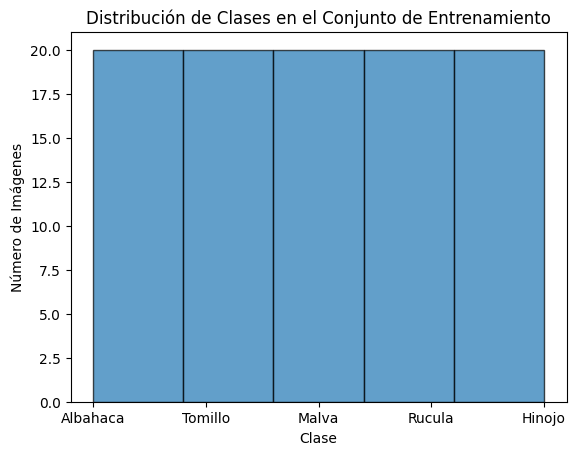

In [ ]:
# Definir las clases
clases = ['Albahaca', 'Tomillo', 'Malva', 'Rucula', 'Hinojo']

# Visualizar la distribución de clases en el conjunto de entrenamiento
plt.hist(train_labels, bins=len(clases), edgecolor='black', alpha=0.7, range=(0, len(clases)-1))

# Configurar el gráfico
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(ticks=range(len(clases)), labels=clases)

# Mostrar el gráfico
plt.show()

In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([20, 20, 20, 20, 20]))

In [4]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import torch
from skimage import exposure

# **Filtros manuales**

Para ver como el modelo va a abstraer información a traves de los distintos filtros, donde cada uno se centra en captar las particularidades de la imagen desde una perspectiva distinta (un filtro capta lineas horizontales, otro verticales, etc.) aplicamos los filtros manualmente para saber que es lo que el modelo va a ir haciendo. Y como captará las particularidades de las plantas

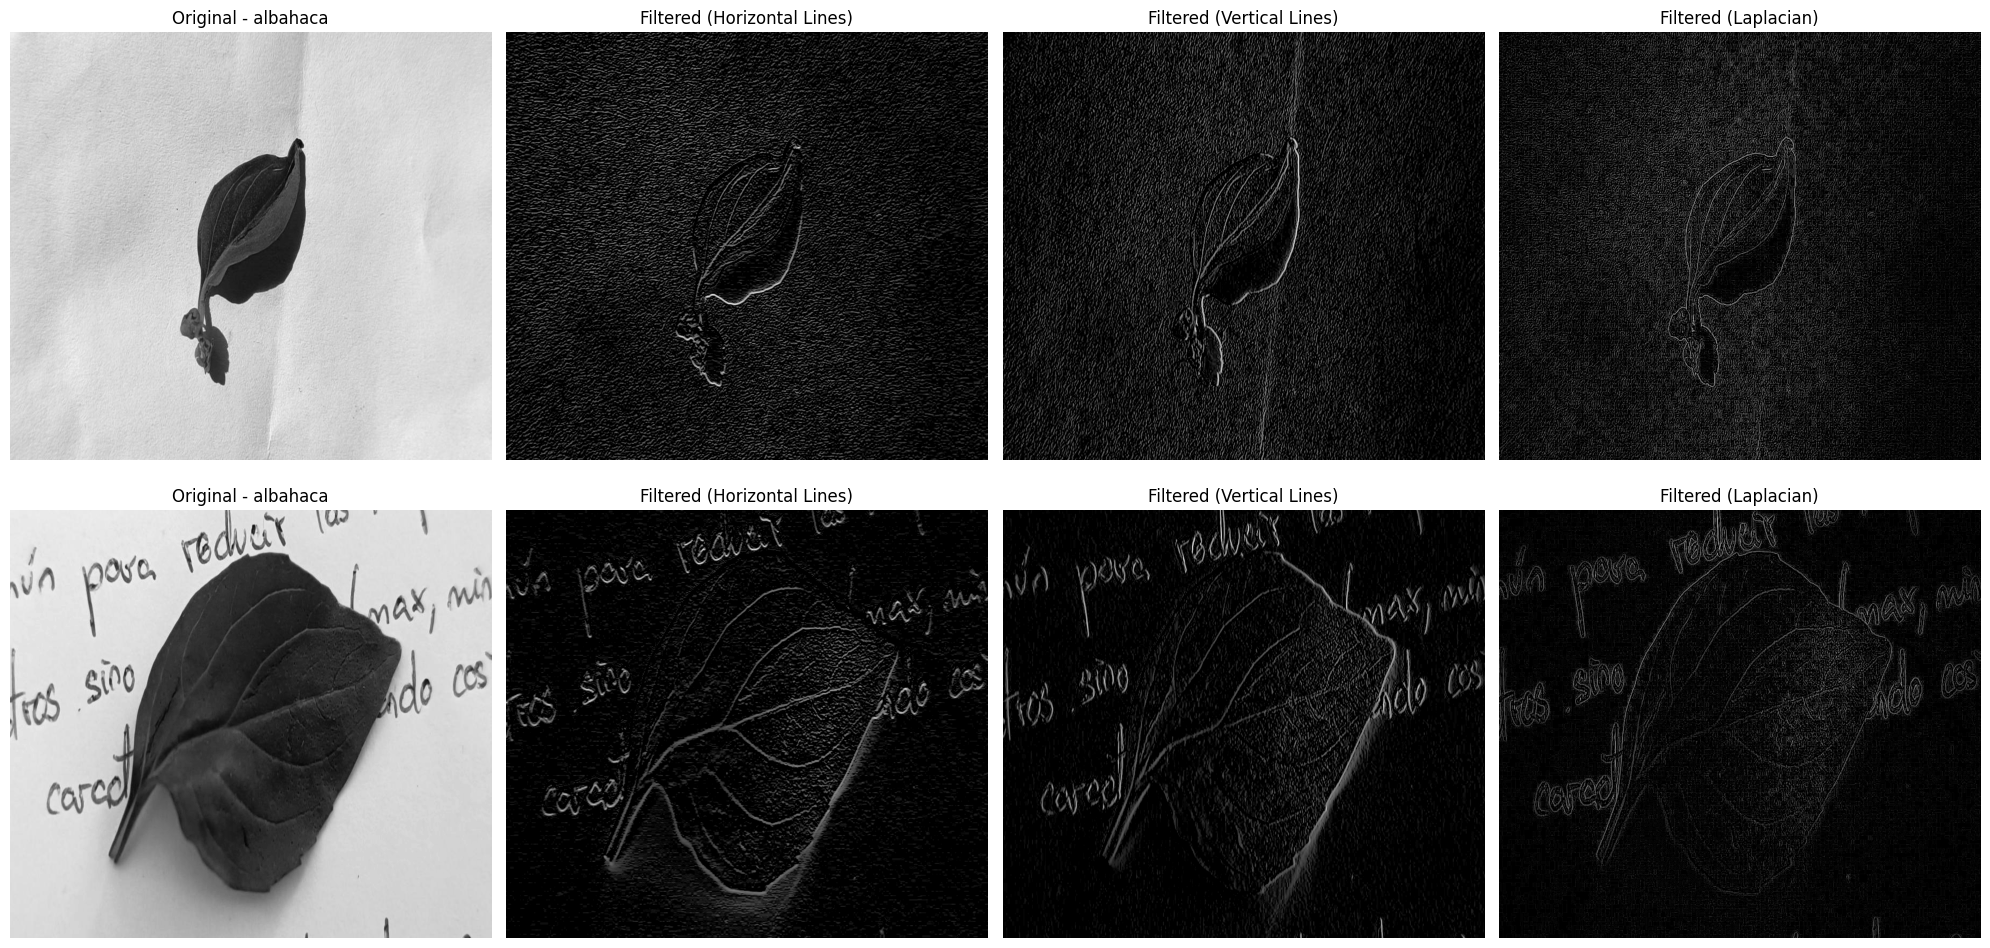

In [5]:


# Función para convertir arrays de NumPy a tensores de PyTorch
def convertir_a_tensor(imagenes_np):
    # Convertir el array de imágenes de NumPy a un tensor de PyTorch y permutar las dimensiones a (N, C, H, W)
    imagenes_tensor = torch.tensor(imagenes_np).permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)
    return imagenes_tensor

# Convertir las imágenes de entrenamiento y prueba a tensores
train_images_tensor = convertir_a_tensor(train_images)
test_images_tensor = convertir_a_tensor(test_images)

# Función para aplicar un filtro a una imagen tensorial
def aplicar_filtro_a_tensor(tensor_img, kernel):
    # Convertir tensor a numpy array
    img_np = tensor_img.numpy().transpose(1, 2, 0)  # Convertir de (C, H, W) a (H, W, C)
    img_gray = np.mean(img_np, axis=2)  # Convertir a escala de grises (promedio de los canales)

    # Aplicar el kernel
    edges = scipy.signal.convolve2d(img_gray, kernel, mode='valid')

    # Normalizar y ajustar el histograma
    edges = exposure.equalize_adapthist(edges / np.max(np.abs(edges)), clip_limit=0.03)

    return edges

# Función para mostrar imágenes originales y filtradas
def mostrar_imagenes_filtradas(imagenes, etiquetas, nombres_plantas, kernel1, kernel2, kernel3):
    plt.figure(figsize=(20, len(imagenes) * 5))

    for i in range(len(imagenes)):
        img_tensor = imagenes[i].numpy().transpose(1, 2, 0)  # Convertir de (C, H, W) a (H, W, C)
        img_gray = np.mean(img_tensor, axis=2)  # Convertir a escala de grises

        edges_kernel1 = aplicar_filtro_a_tensor(imagenes[i], kernel1)
        edges_kernel2 = aplicar_filtro_a_tensor(imagenes[i], kernel2)
        edges_kernel3 = aplicar_filtro_a_tensor(imagenes[i], kernel3)

        plt.subplot(len(imagenes), 4, 4*i + 1)
        plt.imshow(img_gray, cmap='gray')
        plt.title(f'Original - {nombres_plantas[etiquetas[i]]}')
        plt.axis('off')

        plt.subplot(len(imagenes), 4, 4*i + 2)
        plt.imshow(edges_kernel1, cmap='gray')
        plt.title('Filtered (Horizontal Lines)')
        plt.axis('off')

        plt.subplot(len(imagenes), 4, 4*i + 3)
        plt.imshow(edges_kernel2, cmap='gray')
        plt.title('Filtered (Vertical Lines)')
        plt.axis('off')

        plt.subplot(len(imagenes), 4, 4*i + 4)
        plt.imshow(edges_kernel3, cmap='gray')
        plt.title('Filtered (Laplacian)')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Definir los kernels
kernel_horizontal_lines = np.array([[1, 1, 1],
                                    [0, 0, 0],
                                    [-1, -1, -1]])

kernel_vertical_lines = np.array([[1, 0, -1],
                                  [1, 0, -1],
                                  [1, 0, -1]])

kernel_laplacian = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Mostrar imágenes originales y filtradas para las primeras dos imágenes de tu conjunto de entrenamiento
mostrar_imagenes_filtradas(train_images_tensor[:2], train_labels[:2], nombres_plantas, kernel_horizontal_lines, kernel_vertical_lines, kernel_laplacian)


# **Definición del modelo**

A continuación definimos la arquitectura de nuestro modelo, sus datos de entrada, la salida, capas escondidas y el número de epochs

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F

In [8]:
# Configuración inicial
input_dim = 800 * 900 * 3  # Tamaño de la imagen plana
hidden_units = 50  # Número de unidades en la capa oculta
output_dim = 5  # Número de clases ajustado a 5 (albahaca, tomillo, malva, rúcula, hinojo)
epochs = 10  # Número de epochs
checkpoint_path = "/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/model_checkpoint.pth"  # Ruta para guardar el modelo


In [ ]:
# Convertir las imágenes a tensores de PyTorch y moverlas a la GPU
train_images = torch.tensor(train_images, dtype=torch.float32).permute(0, 3, 1, 2).cuda()  # De (batch_size, height, width, channels) a (batch_size, channels, height, width)
test_images = torch.tensor(test_images, dtype=torch.float32).permute(0, 3, 1, 2).cuda()
train_labels = torch.tensor(train_labels, dtype=torch.long).cuda()
test_labels = torch.tensor(test_labels, dtype=torch.long).cuda()

Este modelo CNN (CNNModel) es una red neuronal convolucional diseñada para clasificar imágenes en una de cinco clases de plantas. La red consta de tres capas convolucionales, seguidas de capas de pooling y dos capas completamente conectadas (fully connected, FC).

Capas Convolucionales:

conv1: La primera capa convolucional toma imágenes de entrada con 3 canales (RGB) y aplica 8 filtros de tamaño 3x3, produciendo 8 mapas de características.
conv2: La segunda capa toma la salida de la primera, con 8 canales, y aplica 16 filtros de 3x3, produciendo 16 mapas de características.
conv3: La tercera capa convolucional aplica 32 filtros de 3x3 a los 16 canales de entrada, produciendo 32 mapas de características.
Capas de Pooling:

Cada capa convolucional está seguida de una operación de max pooling con una ventana de 2x2, que reduce a la mitad las dimensiones espaciales de los mapas de características.
Capas Completamente Conectadas (FC):

Después de la tercera capa convolucional, los mapas de características resultantes se aplanan en un vector de características de 32 * 112 * 100 neuronas.
Este vector se pasa a través de una capa completamente conectada con 256 neuronas y luego a una capa final que produce 5 valores, uno para cada clase de planta.

In [9]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Definición de la red con menos filtros
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)  # Menos filtros
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Ajustar el tamaño de entrada de la capa FC según el tamaño de la imagen después del pooling
        self.fc1 = nn.Linear(32 * 112 * 100, 256)  # Reducir el número de neuronas en la capa FC
        self.fc2 = nn.Linear(256, 5)  # Número de clases

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Aplanar el tensor para pasar a las capas completamente conectadas
        x = x.view(-1, 32 * 112 * 100)  # Ajustar el tamaño de entrada según el tamaño de la imagen después del pooling

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

las capas completamente conectadas (fc1 y fc2) no reciben directamente los datos de la capa de pooling en su forma original. En el modelo, las capas convolucionales y de pooling producen mapas de características tridimensionales (con dimensiones: canales, altura, y anchura). Antes de que estos datos puedan ser procesados por las capas completamente conectadas, necesitan ser aplanados (convertidos en un vector unidimensional). Esto se hace mediante la operación view en PyTorch, que reorganiza el tensor 3D en un tensor 1D para que pueda ser pasado a las capas completamente conectadas.

Las dimensiones 32 * 112 * 100 no son arbitrarias; son el resultado del proceso de convolución y pooling aplicado a la entrada inicial.

Canales (32): Este valor proviene del número de filtros en la última capa convolucional (conv3). En este caso, conv3 tiene 32 filtros, por lo que la salida tiene 32 canales.

Dimensiones Espaciales (112 * 100): Estas dimensiones dependen del tamaño de la imagen original y cómo se modifican a través de las capas de convolución y pooling. Cada operación de convolución seguida de pooling reduce las dimensiones espaciales de la imagen.

Si la imagen original tiene un tamaño de entrada de 224x200, después de cada operación de pooling (que reduce las dimensiones a la mitad), las dimensiones espaciales finales se convertirían en 112x100.
Así que las características 32 * 112 * 100 se derivan del tamaño de la imagen de entrada y de la arquitectura específica de las capas de la red (número de filtros y operaciones de pooling).

# **Viendo los filtros del modelo**

Comprobamos como el  modelo abstrae las características esenciales de las imagenes

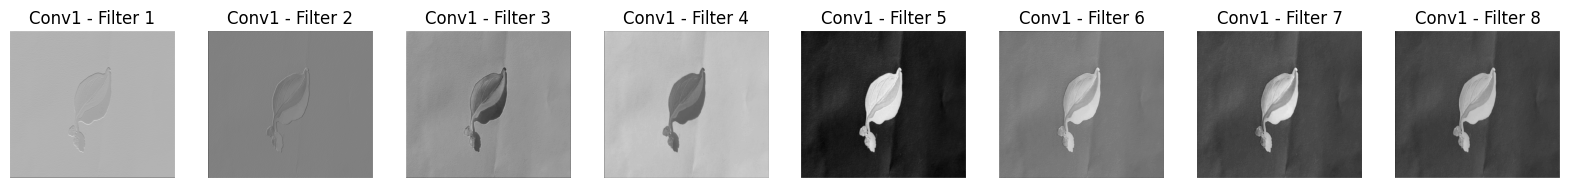

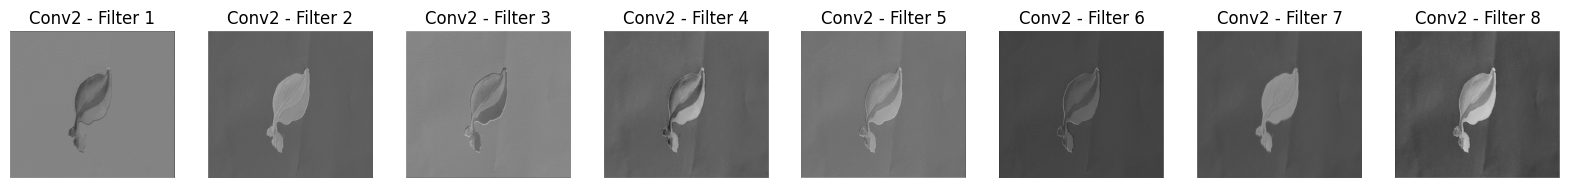

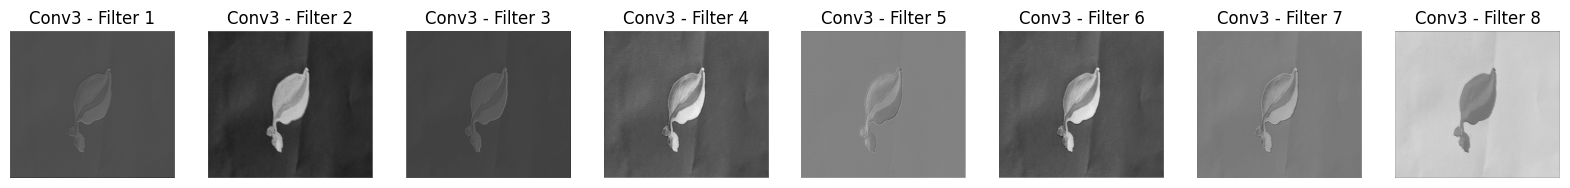

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Asegurarse de que las imágenes están en el formato correcto para la red
train_images_tensor = torch.Tensor(train_images).permute(0, 3, 1, 2)  # Convertir de (N, H, W, C) a (N, C, H, W)
train_labels_tensor = torch.LongTensor(train_labels)

# Instanciar el modelo y configurarlo en modo evaluación
model = CNNModel()
model.eval()

# Seleccionar las primeras dos imágenes de diferentes plantas (por ejemplo, de las clases 0 y 1)
images_to_show = train_images_tensor[:2]
labels_to_show = train_labels_tensor[:2]

# Pasar las imágenes a través de las capas convolucionales
with torch.no_grad():
    conv1_output = model.conv1(images_to_show)
    conv2_output = model.conv2(F.relu(conv1_output))
    conv3_output = model.conv3(F.relu(conv2_output))

# Función para mostrar las salidas de las capas convolucionales
def show_feature_maps(layer_output, layer_name, num_filters=8):
    plt.figure(figsize=(20, num_filters * 2.5))
    for i in range(num_filters):
        plt.subplot(1, num_filters, i + 1)
        plt.imshow(layer_output[0, i].cpu().numpy(), cmap='gray')
        plt.title(f'{layer_name} - Filter {i + 1}')
        plt.axis('off')
    plt.show()

# Visualizar las salidas de la primera capa convolucional
show_feature_maps(conv1_output, 'Conv1', num_filters=8)

# Visualizar las salidas de la segunda capa convolucional
show_feature_maps(conv2_output, 'Conv2', num_filters=8)

# Visualizar las salidas de la tercera capa convolucional
show_feature_maps(conv3_output, 'Conv3', num_filters=8)

# **Fit de un subConjunto**

Para asegurarnos el correcto diseño de la arquitectura del modelo (entradas, salidas y dimensiones correctas)

Entrenamos un subconjunto con datos aleatorios del total porque así podemos tener una idea de como será el modelo final con todos los datos, así podemos hacer pruebas con pocos recursos, de manera que podemos ver que hiperparametros (lr, epochs, capas ocultas, batches, y otros son los más convenientes a usar en el modelo final para obtener la máxima precisión posible y la pérdida más baja.

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Crear el Dataset para el subconjunto
dataset = {
    'train': TensorDataset(train_images, train_labels),
    'val': TensorDataset(test_images, test_labels)  # Usaremos el conjunto de prueba como validación
}

# Crear el DataLoader para el subconjunto
dataloader = {
    'train': DataLoader(dataset['train'], batch_size=16, shuffle=True),
    'val': DataLoader(dataset['val'], batch_size=16, shuffle=False)
}

In [ ]:
from sklearn.metrics import accuracy_score
import torch

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

In [ ]:
import gc

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=30, log_each=1, weight_decay=0, early_stopping=0, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mejorModeloSubConjunto.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/mejorModeloSubConjunto.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

lrs = [0.0002, 0.0001, 0.002, 0.00015]
hists = []

In [ ]:
for lr in lrs:
    print(f"Probando lr {lr}")
    model = CNNModel().cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    hist = fit(model, dataloader, optimizer, epochs=30, verbose=0)
    hists.append(hist)

Probando lr 0.0002
Epoch 1/30 - Train Loss: 233.61346, Train Acc: 0.18750, Val Loss: 135.43054, Val Acc: 0.15625
Epoch 2/30 - Train Loss: 59.17503, Train Acc: 0.37500, Val Loss: 11.89530, Val Acc: 0.65625
Epoch 3/30 - Train Loss: 16.27681, Train Acc: 0.42857, Val Loss: 15.68381, Val Acc: 0.21875
Epoch 4/30 - Train Loss: 7.27067, Train Acc: 0.50000, Val Loss: 1.69484, Val Acc: 0.75000
Epoch 5/30 - Train Loss: 2.68387, Train Acc: 0.62500, Val Loss: 1.11221, Val Acc: 0.84375
Epoch 6/30 - Train Loss: 1.81026, Train Acc: 0.81250, Val Loss: 0.92289, Val Acc: 0.87500
Epoch 7/30 - Train Loss: 0.71227, Train Acc: 0.80357, Val Loss: 1.10026, Val Acc: 0.90625
Epoch 8/30 - Train Loss: 0.58605, Train Acc: 0.90179, Val Loss: 1.58009, Val Acc: 0.84375
Epoch 9/30 - Train Loss: 0.22228, Train Acc: 0.92857, Val Loss: 1.07764, Val Acc: 0.84375
Epoch 10/30 - Train Loss: 0.08119, Train Acc: 0.95536, Val Loss: 0.98206, Val Acc: 0.90625
Epoch 11/30 - Train Loss: 0.09133, Train Acc: 0.95536, Val Loss: 0.64964

<ipython-input-25-b7d81b37449a>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Probando lr 0.0001
Epoch 1/30 - Train Loss: 335.30994, Train Acc: 0.18750, Val Loss: 413.59126, Val Acc: 0.12500
Epoch 2/30 - Train Loss: 163.54805, Train Acc: 0.17857, Val Loss: 92.81268, Val Acc: 0.25000
Epoch 3/30 - Train Loss: 102.13388, Train Acc: 0.39286, Val Loss: 59.07737, Val Acc: 0.62500
Epoch 4/30 - Train Loss: 72.81554, Train Acc: 0.34821, Val Loss: 24.69554, Val Acc: 0.75000
Epoch 5/30 - Train Loss: 33.95404, Train Acc: 0.50000, Val Loss: 16.28568, Val Acc: 0.62500
Epoch 6/30 - Train Loss: 16.96341, Train Acc: 0.55357, Val Loss: 19.39519, Val Acc: 0.25000
Epoch 7/30 - Train Loss: 6.73079, Train Acc: 0.54464, Val Loss: 1.33175, Val Acc: 0.43750
Epoch 8/30 - Train Loss: 4.08675, Train Acc: 0.66964, Val Loss: 3.26180, Val Acc: 0.65625
Epoch 9/30 - Train Loss: 3.66286, Train Acc: 0.66071, Val Loss: 1.98604, Val Acc: 0.78125
Epoch 10/30 - Train Loss: 2.01121, Train Acc: 0.73214, Val Loss: 4.52998, Val Acc: 0.56250
Epoch 11/30 - Train Loss: 1.17248, Train Acc: 0.80357, Val Loss:

<ipython-input-25-b7d81b37449a>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Probando lr 0.002
Epoch 1/30 - Train Loss: 275.07020, Train Acc: 0.21429, Val Loss: 9.97183, Val Acc: 0.56250
Epoch 2/30 - Train Loss: 7.65333, Train Acc: 0.38393, Val Loss: 1.70588, Val Acc: 0.65625
Epoch 3/30 - Train Loss: 1.49544, Train Acc: 0.47321, Val Loss: 1.68081, Val Acc: 0.40625
Epoch 4/30 - Train Loss: 1.10141, Train Acc: 0.50893, Val Loss: 1.10099, Val Acc: 0.43750
Epoch 5/30 - Train Loss: 0.87683, Train Acc: 0.71429, Val Loss: 1.43196, Val Acc: 0.75000
Epoch 6/30 - Train Loss: 0.88279, Train Acc: 0.81250, Val Loss: 1.70975, Val Acc: 0.53125
Epoch 7/30 - Train Loss: 0.42498, Train Acc: 0.88393, Val Loss: 2.21050, Val Acc: 0.65625
Epoch 8/30 - Train Loss: 0.29829, Train Acc: 0.91964, Val Loss: 3.39710, Val Acc: 0.62500
Epoch 9/30 - Train Loss: 0.20969, Train Acc: 0.91964, Val Loss: 8.91486, Val Acc: 0.53125
Epoch 10/30 - Train Loss: 0.27801, Train Acc: 0.88393, Val Loss: 1.27781, Val Acc: 0.81250
Epoch 11/30 - Train Loss: 0.23463, Train Acc: 0.95536, Val Loss: 1.44787, Val A

<ipython-input-25-b7d81b37449a>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Probando lr 0.00015
Epoch 1/30 - Train Loss: 381.91004, Train Acc: 0.15179, Val Loss: 179.11581, Val Acc: 0.12500
Epoch 2/30 - Train Loss: 194.45369, Train Acc: 0.17857, Val Loss: 52.52368, Val Acc: 0.15625
Epoch 3/30 - Train Loss: 21.11143, Train Acc: 0.49107, Val Loss: 41.37362, Val Acc: 0.12500
Epoch 4/30 - Train Loss: 16.68725, Train Acc: 0.50000, Val Loss: 8.31898, Val Acc: 0.75000
Epoch 5/30 - Train Loss: 11.40895, Train Acc: 0.56250, Val Loss: 13.60719, Val Acc: 0.37500
Epoch 6/30 - Train Loss: 8.26896, Train Acc: 0.51786, Val Loss: 6.54477, Val Acc: 0.62500
Epoch 7/30 - Train Loss: 7.59750, Train Acc: 0.54464, Val Loss: 7.39678, Val Acc: 0.59375
Epoch 8/30 - Train Loss: 3.78711, Train Acc: 0.60714, Val Loss: 1.73739, Val Acc: 0.81250
Epoch 9/30 - Train Loss: 1.37453, Train Acc: 0.78571, Val Loss: 7.48813, Val Acc: 0.46875
Epoch 10/30 - Train Loss: 2.65466, Train Acc: 0.77679, Val Loss: 13.74401, Val Acc: 0.34375
Epoch 11/30 - Train Loss: 1.34204, Train Acc: 0.83929, Val Loss: 1

<ipython-input-25-b7d81b37449a>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

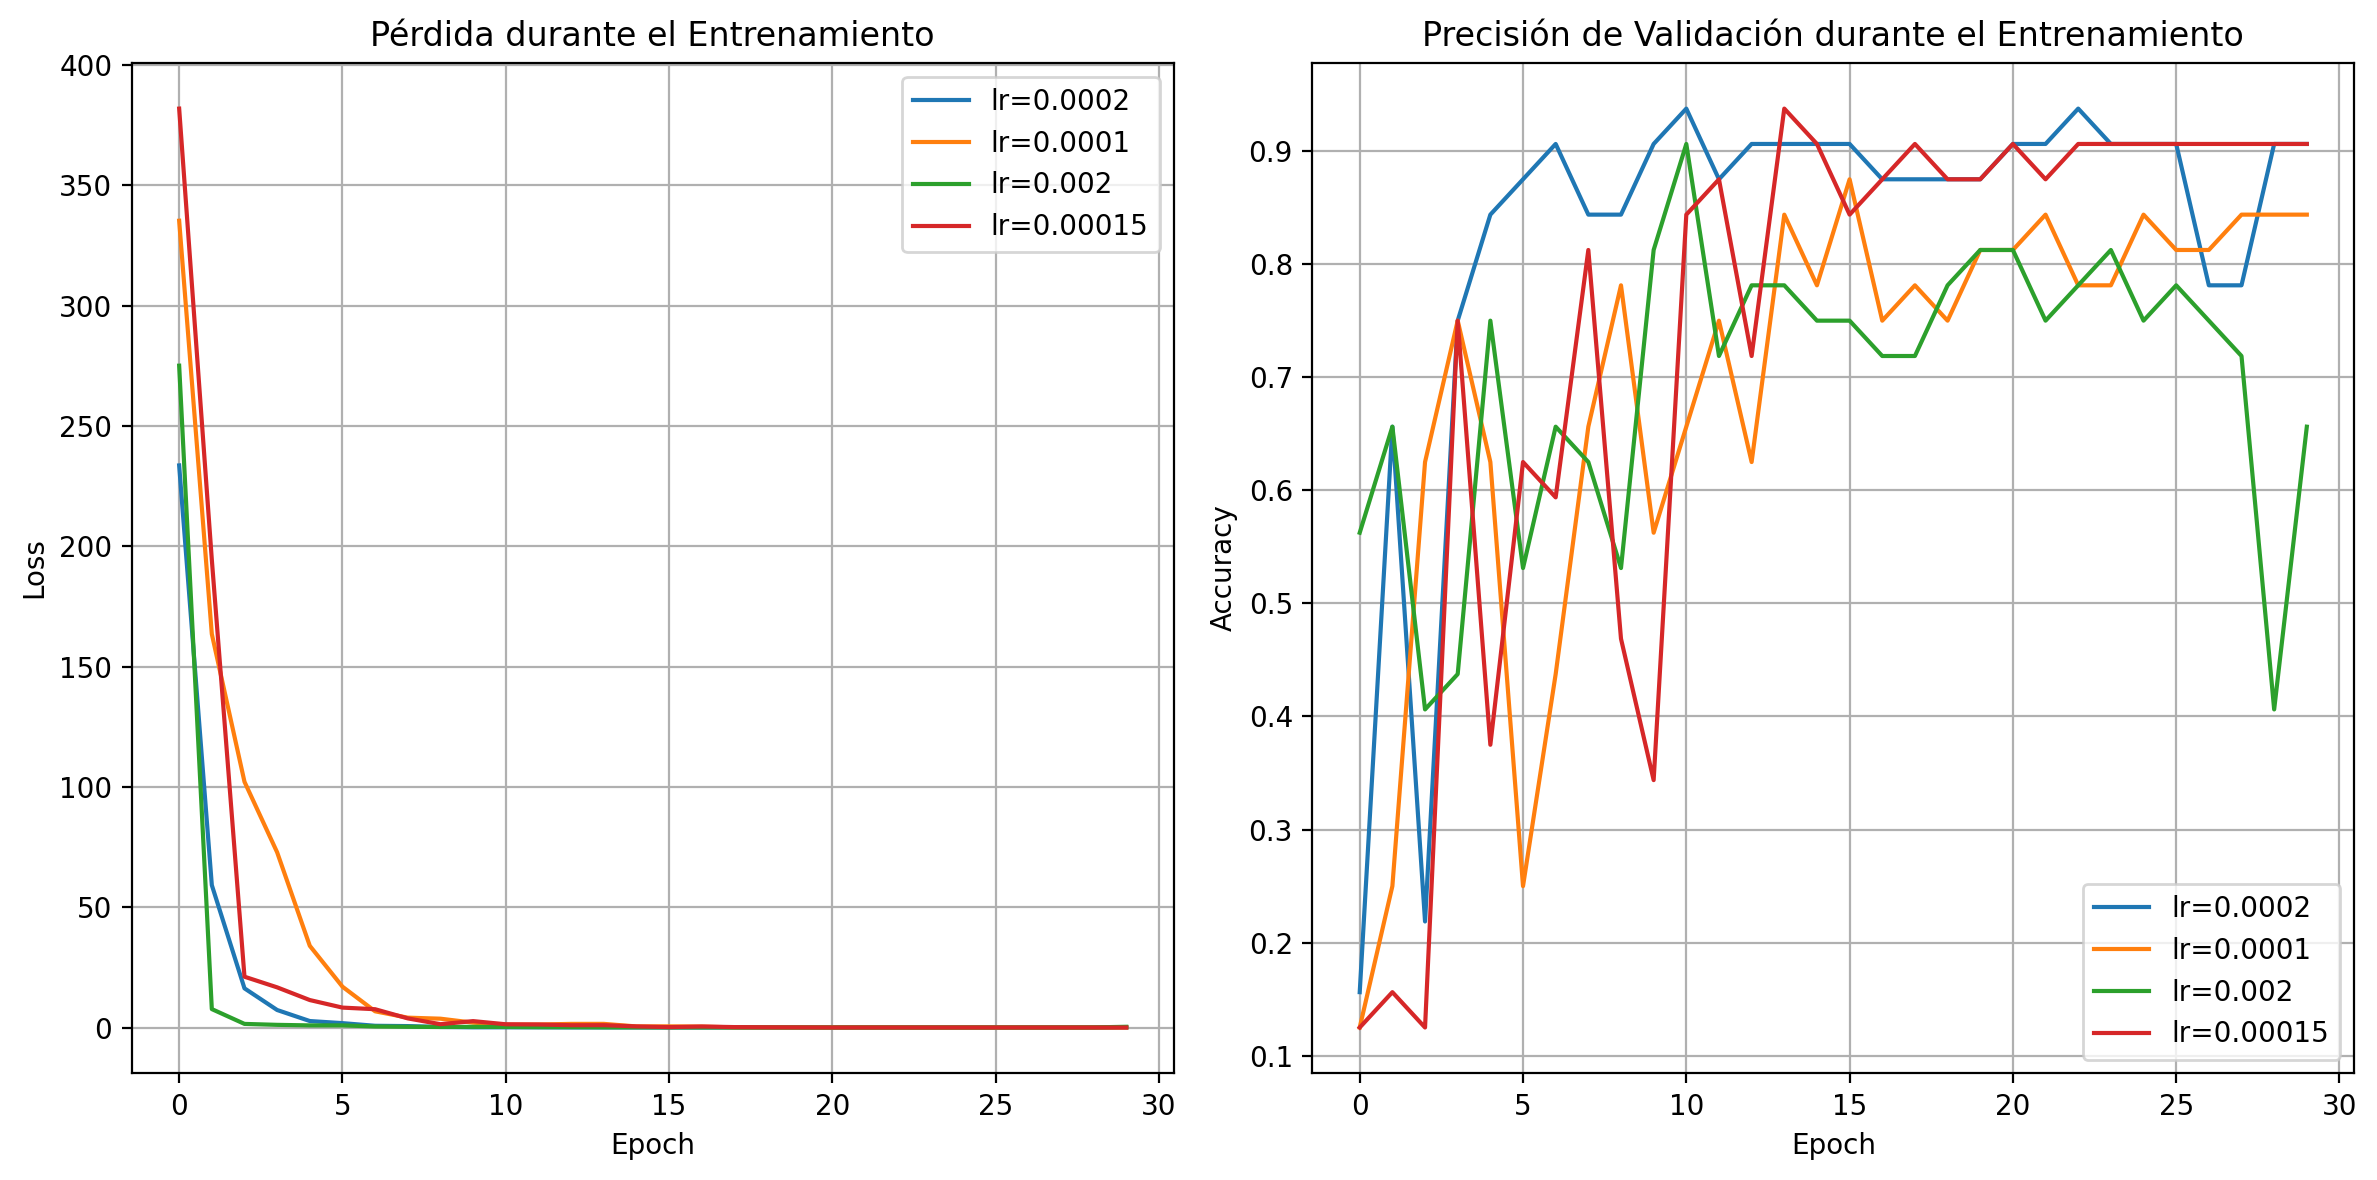

In [ ]:
import matplotlib.pyplot as plt

# Visualización
fig = plt.figure(dpi=200, figsize=(12, 6))

# Gráfico de pérdida
ax1 = plt.subplot(121)
for i in range(len(lrs)):
    ax1.plot(hists[i]['loss'], label=f'lr={lrs[i]}')
ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Pérdida durante el Entrenamiento')

# Gráfico de precisión de validación
ax2 = plt.subplot(122)
for i in range(len(lrs)):
    ax2.plot(hists[i]['val_acc'], label=f'lr={lrs[i]}')
ax2.legend()
ax2.grid(True)
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_title('Precisión de Validación durante el Entrenamiento')

plt.tight_layout()
plt.show()

El gráfico nos deja ver que todos los lr llegan a una pédida muy baja pero 0.002 lo hace más rápido y 0.0001 es el que más tarda en conseguirlo. Por otro lado los distintos lr alcanzan presiciones distintas entre sí. Siendo 0.0002 y 0.00015 los valores que alcanzan la mayor presición en el menor número de epochs. (Es importante ver cual lo alcanza antes, porque mientras antes se alcanze la mayor presición menos recursos de cómputo o procesamiento se requieren)

# **Entrenando con todos los datos**

Ahora que hemos visto como funcionan los datos, como son filtrados, comprobado la validez de los datos y del funcionamiento del modelo, y despues de entrenar y hacer pruebas con una muestra para hallar los mejores hiperparametros, podemos entrenar todos los datos.

# **Comienza el entrenamiento**

In [ ]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Cargar el dataset desde el archivo pickle
def cargar_pickle(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Cargar datos de entrenamiento
ruta_archivo_pickle_train = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dataHojas_7.pkl'
dataset_train = cargar_pickle(ruta_archivo_pickle_train)

# Crear listas para almacenar todas las imágenes y etiquetas de entrenamiento
train_images = []
train_labels = []

for imagen_array, etiqueta in dataset_train:
    train_images.append(imagen_array)
    train_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Verificar las dimensiones
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)

Dimensiones de train_images: (250, 800, 900, 3)
Dimensiones de train_labels: (250,)


In [ ]:
import pickle
import numpy as np
import random

# Definir las etiquetas de las plantas
nombres_plantas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Cargar datos de prueba
ruta_archivo_pickle_test = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/pruebas.pkl'
dataset_test = cargar_pickle(ruta_archivo_pickle_test)

# Crear listas para almacenar todas las imágenes y etiquetas de prueba
test_images = []
test_labels = []

for imagen_array, etiqueta in dataset_test:
    test_images.append(imagen_array)
    test_labels.append(etiqueta)

# Convertir listas a arrays de NumPy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Verificar las dimensiones
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de test_images: (200, 800, 900, 3)
Dimensiones de test_labels: (200,)


In [ ]:
unique, counts = np.unique(train_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([50, 50, 50, 50, 50]))

In [ ]:
unique, counts = np.unique(test_labels, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([40, 40, 40, 40, 40]))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Dataset personalizado para entrenamiento y prueba
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X / 255., dtype=torch.float32).permute(0, 3, 1, 2)  # Normalización y ajuste de tamaño
        self.Y = torch.tensor(Y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [ ]:
# Crear Datasets y DataLoaders
train_dataset = CustomDataset(train_images, train_labels)
test_dataset = CustomDataset(test_images, test_labels)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
print(len(test_dataset))  # Verificar que el tamaño del dataset es el esperado

200


In [ ]:
# Iterando sobre el train_dataloader
print("Primeros cinco elementos del train_dataloader:")
for i, data in enumerate(train_dataset):
    if i < 1:
        print(data)
    else:
        break

Primeros cinco elementos del train_dataloader:
(tensor([[[0.8510, 0.8549, 0.8549,  ..., 0.8431, 0.8431, 0.8431],
         [0.8510, 0.8549, 0.8549,  ..., 0.8431, 0.8431, 0.8431],
         [0.8510, 0.8549, 0.8549,  ..., 0.8431, 0.8431, 0.8431],
         ...,
         [0.8392, 0.8392, 0.8353,  ..., 0.8824, 0.8824, 0.8784],
         [0.8353, 0.8353, 0.8353,  ..., 0.8784, 0.8784, 0.8745],
         [0.8314, 0.8314, 0.8314,  ..., 0.8745, 0.8745, 0.8706]],

        [[0.6980, 0.7020, 0.7020,  ..., 0.6941, 0.6941, 0.6941],
         [0.6980, 0.7020, 0.7020,  ..., 0.6941, 0.6941, 0.6941],
         [0.6980, 0.7020, 0.7020,  ..., 0.6941, 0.6941, 0.6941],
         ...,
         [0.6863, 0.6863, 0.6824,  ..., 0.7294, 0.7294, 0.7255],
         [0.6824, 0.6824, 0.6824,  ..., 0.7255, 0.7255, 0.7216],
         [0.6784, 0.6784, 0.6784,  ..., 0.7216, 0.7216, 0.7176]],

        [[0.0510, 0.0549, 0.0549,  ..., 0.0549, 0.0549, 0.0549],
         [0.0510, 0.0549, 0.0549,  ..., 0.0549, 0.0549, 0.0549],
         [

In [ ]:
print(len(train_dataset))  # Verificar que el tamaño del dataset es el esperado

250


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Definición de la red con menos filtros
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)  # Menos filtros
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Ajustar el tamaño de entrada de la capa FC según el tamaño de la imagen después del pooling
        self.fc1 = nn.Linear(32 * 112 * 100, 256)  # Reducir el número de neuronas en la capa FC
        self.fc2 = nn.Linear(256, 5)  # Número de clases

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Aplanar el tensor para pasar a las capas completamente conectadas
        x = x.view(-1, 32 * 112 * 100)  # Ajustar el tamaño de entrada según el tamaño de la imagen después del pooling

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [ ]:
# Crear el Dataset para el subconjunto
dataset = {
    'train': train_dataset,
    'val': test_dataset  # Usaremos el conjunto de prueba como validación
}

# Crear el DataLoader para el subconjunto
dataloader = {
    'train': DataLoader(dataset['train'], batch_size=16, shuffle=True),
    'val': DataLoader(dataset['val'], batch_size=16, shuffle=False)
}

In [ ]:
from sklearn.metrics import accuracy_score
import torch

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

In [ ]:
import gc

In [ ]:
def fit(model, dataloader, optimizer, scheduler=None, epochs=1000, log_each=1, weight_decay=0, early_stopping=100, verbose=1):
    criterion = torch.nn.CrossEntropyLoss()
    l, acc, lr = [], [], []
    val_l, val_acc = [], []
    best_acc, step = 0.956, 0

    for e in range(1, epochs + 1):
        _l, _acc = [], []

        for param_group in optimizer.param_groups:
            lr.append(param_group['lr'])

        model.train()
        for x_b, y_b in dataloader['train']:
            x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
            y_pred = model(x_b)
            loss = criterion(y_pred, y_b)
            _l.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_probas = torch.argmax(softmax(y_pred), axis=1)
            _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().detach().numpy()))

        l.append(np.mean(_l))
        acc.append(np.mean(_acc))

        model.eval()
        _l, _acc = [], []
        with torch.no_grad():
            for x_b, y_b in dataloader['val']:
                x_b, y_b = x_b.cuda(), y_b.cuda()  # Mover a GPU
                y_pred = model(x_b)
                loss = criterion(y_pred, y_b)
                _l.append(loss.item())
                y_probas = torch.argmax(softmax(y_pred), axis=1)
                _acc.append(accuracy_score(y_b.cpu().numpy(), y_probas.cpu().numpy()))

        val_l.append(np.mean(_l))
        val_acc.append(np.mean(_acc))

        # Guardar el mejor modelo
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            torch.save(model.state_dict(), '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN.pt')
            step = 0
            if verbose == 2:
                print(f"Mejor modelo guardado con acc {best_acc:.5f} en epoch {e}")

        step += 1
        if scheduler:
            scheduler.step()

        # Parar el entrenamiento si no hay mejora
        if early_stopping and step > early_stopping:
            print(f"Entrenamiento detenido en epoch {e} por no mejorar en {early_stopping} epochs seguidas")
            break

        # Imprimir resultados por epoch
        print(f"Epoch {e}/{epochs} - Train Loss: {l[-1]:.5f}, Train Acc: {acc[-1]:.5f}, Val Loss: {val_l[-1]:.5f}, Val Acc: {val_acc[-1]:.5f}")

        # Liberar memoria
        del x_b, y_b, y_pred, loss, y_probas
        gc.collect()
        torch.cuda.empty_cache()

    # Cargar el mejor modelo
    model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN.pt'))

    return {
        'epoch': list(range(1, len(l) + 1)),
        'loss': l,
        'acc': acc,
        'val_loss': val_l,
        'val_acc': val_acc,
        'lr': lr
    }

In [ ]:
import os

In [ ]:

modelo_path = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN.pt'

# Verificar si el archivo existe y no está vacío
if os.path.exists(modelo_path) and os.path.getsize(modelo_path) > 0:
    model = CNNModel().cuda()
    model.load_state_dict(torch.load(modelo_path))
    print(f"Modelo cargado desde {modelo_path}")
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
    hist = fit(model, dataloader, optimizer, epochs=1000, verbose=0)
else:
    print(f"No se encontró el archivo {modelo_path} o está vacío. Se comenzará a entrenar un modelo nuevo.")
    model = CNNModel().cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)
    hist = fit(model, dataloader, optimizer, epochs=1000, verbose=0)


<ipython-input-22-d752d4cdef70>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelo_path))


Modelo cargado desde /content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN.pt
Epoch 1/1000 - Train Loss: 0.30983, Train Acc: 0.86875, Val Loss: 0.29191, Val Acc: 0.88462
Epoch 2/1000 - Train Loss: 0.20611, Train Acc: 0.91328, Val Loss: 0.19790, Val Acc: 0.92308
Epoch 3/1000 - Train Loss: 0.11667, Train Acc: 0.96094, Val Loss: 0.20074, Val Acc: 0.95192
Epoch 4/1000 - Train Loss: 0.08748, Train Acc: 0.98047, Val Loss: 0.20278, Val Acc: 0.92788
Epoch 5/1000 - Train Loss: 0.07023, Train Acc: 0.98828, Val Loss: 0.20805, Val Acc: 0.94712
Epoch 6/1000 - Train Loss: 0.05506, Train Acc: 0.99609, Val Loss: 0.20707, Val Acc: 0.93750
Epoch 7/1000 - Train Loss: 0.04337, Train Acc: 0.99609, Val Loss: 0.23704, Val Acc: 0.93750
Epoch 8/1000 - Train Loss: 0.03688, Train Acc: 0.99219, Val Loss: 0.20366, Val Acc: 0.95673
Epoch 9/1000 - Train Loss: 0.02394, Train Acc: 1.00000, Val Loss: 0.22478, Val Acc: 0.93750
Epoch 10/1000 - Train Loss: 0.01620, Train Acc: 1.00000, Val Loss:

<ipython-input-20-362ac1f2003e>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

Despues de entrenar con todos los datos, el modelo ha alcanzado una presición final de 95.6% el cual es un gran valor. Aunque probablemente el modelo este muy ajustado a los datos, tanto de pruebas como de entrenamiento, pues son parecidos entre sí.

**Probando el modelo con imagenes de hojas tomadas de internet.**

In [11]:
import os
from PIL import Image

# Ruta de la carpeta donde están las imágenes
carpeta_origen = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim'

# Ruta de la carpeta de destino donde se guardarán las imágenes en formato JPG
carpeta_destino = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim'

# Crear la carpeta de destino si no existe
os.makedirs(carpeta_destino, exist_ok=True)

# Iterar sobre todos los archivos en la carpeta de origen
for archivo in os.listdir(carpeta_origen):
    # Ruta completa del archivo
    ruta_archivo = os.path.join(carpeta_origen, archivo)

    # Intentar abrir el archivo como una imagen
    try:
        with Image.open(ruta_archivo) as imagen:
            # Convertir el nombre de archivo a .jpg
            nombre_archivo_jpg = os.path.splitext(archivo)[0] + '.jpg'
            ruta_destino = os.path.join(carpeta_destino, nombre_archivo_jpg)

            # Guardar la imagen en formato JPG
            imagen.convert('RGB').save(ruta_destino, 'JPEG')

            print(f'Imagen convertida: {nombre_archivo_jpg}')

    except Exception as e:
        print(f'Error al convertir {archivo}: {e}')

Imagen convertida: hinojo3.jpg
Imagen convertida: hinojo2.jpg
Imagen convertida: rucula2.jpg
Imagen convertida: malva5.jpg
Imagen convertida: rucula4.jpg
Imagen convertida: rucula1.jpg
Imagen convertida: rucula5.jpg
Imagen convertida: hinojo3.jpg
Imagen convertida: hinojo2.jpg
Imagen convertida: rucula2.jpg
Imagen convertida: malva5.jpg
Imagen convertida: rucula4.jpg
Imagen convertida: rucula1.jpg
Imagen convertida: rucula5.jpg
Imagen convertida: rucula3.jpg
Imagen convertida: hinojo1.jpg


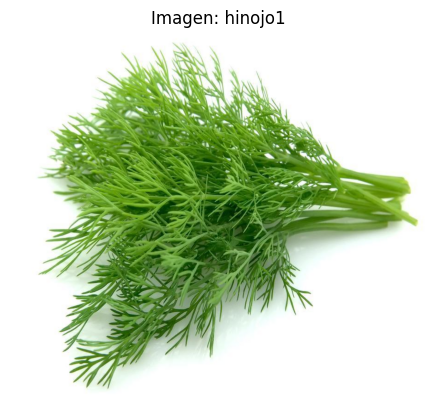

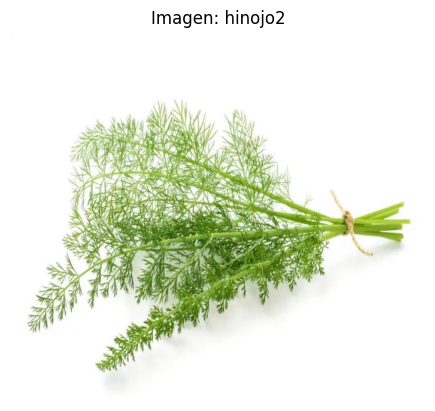

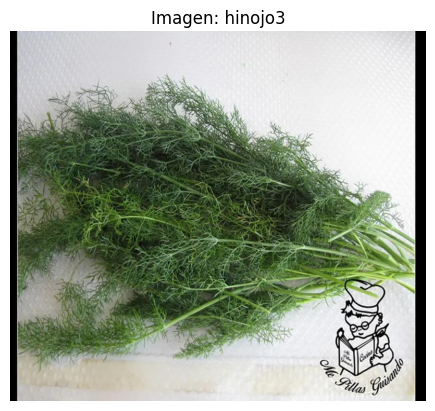

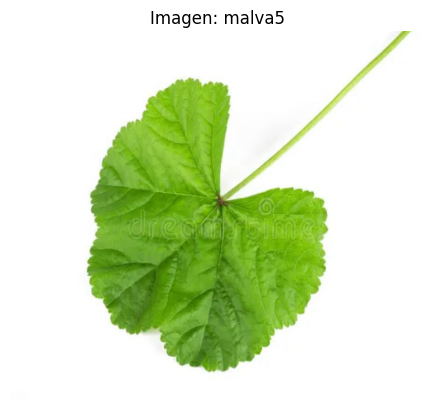

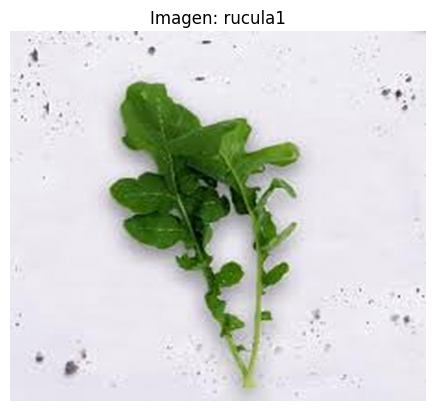

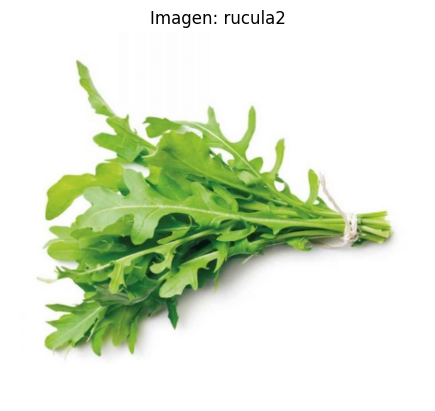

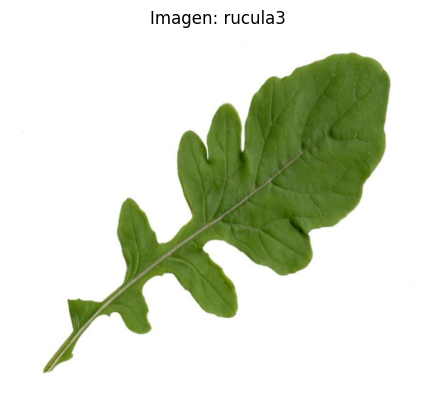

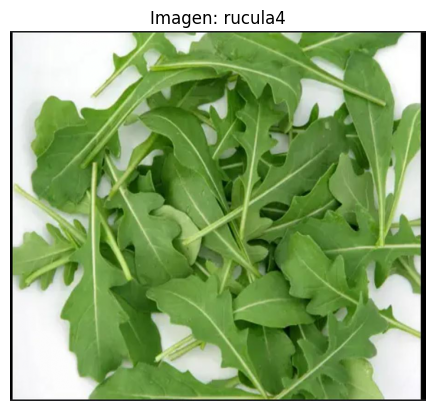

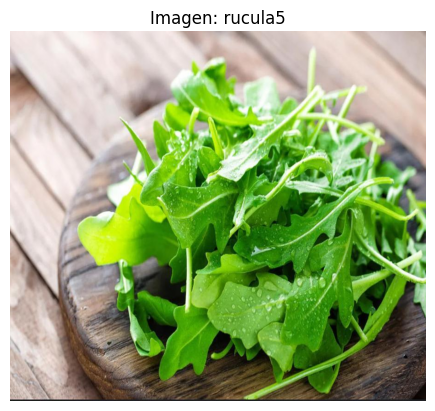

In [12]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Definir la etiqueta para las imágenes (puedes cambiar esto según tu necesidad)
etiqueta = 0  # Cambia esto según la etiqueta que desees asignar

# Lista de nombres de imágenes
imagenes_nombres = [
    'hinojo1', 'hinojo2', 'hinojo3',
    'malva5',
    'rucula1', 'rucula2', 'rucula3', 'rucula4', 'rucula5'
]

# Ruta base de las imágenes
ruta_base = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim/'

# Inicializar una lista para guardar los pares (imagen_tensor, etiqueta)
pares_imagen_etiqueta = []

for nombre_imagen in imagenes_nombres:
    # Crear la ruta completa de la imagen
    imagen_path = ruta_base + nombre_imagen + '.jpg'

    # Cargar la imagen
    imagen = Image.open(imagen_path)

    # Convertir la imagen a un array de NumPy
    imagen_array = np.array(imagen)

    # Normalizar la imagen (valores entre 0 y 1)
    imagen_normalizada = imagen_array / 255.0

    # Aplanar la imagen (convertirla a un vector unidimensional)
    imagen_aplanada = imagen_normalizada.flatten()

    # Convertir a tensor de PyTorch
    imagen_tensor = torch.tensor(imagen_aplanada, dtype=torch.float32)

    # Guardar el par (imagen_tensor, etiqueta)
    pares_imagen_etiqueta.append((imagen_tensor, etiqueta))

    # Imprimir la imagen usando pyplot
    plt.imshow(imagen_normalizada)
    plt.title(f'Imagen: {nombre_imagen}')
    plt.axis('off')
    plt.show()

# Si deseas, ahora puedes trabajar con la lista pares_imagen_etiqueta

<ipython-input-14-654d82bfad91>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dat

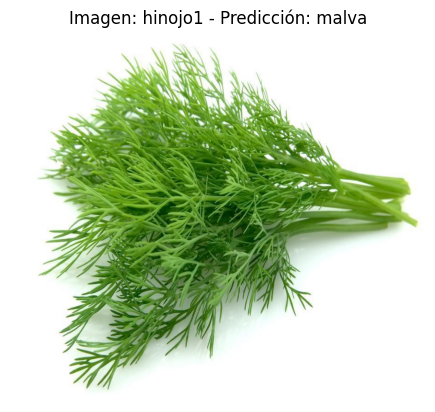

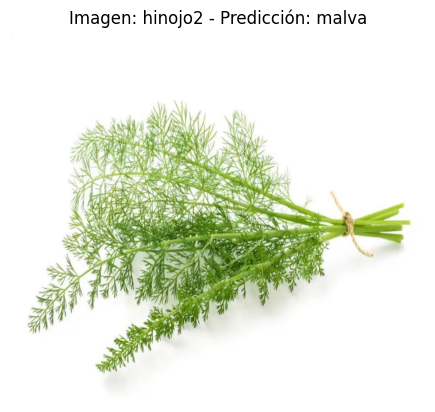

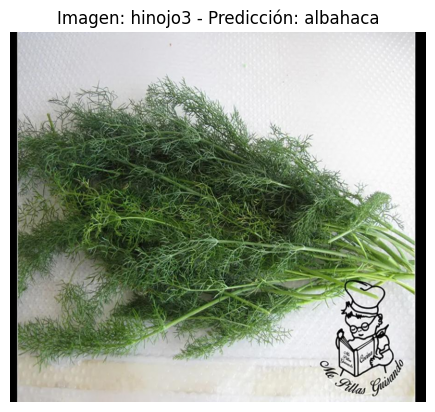

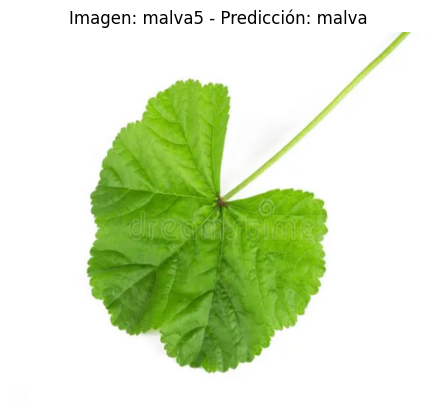

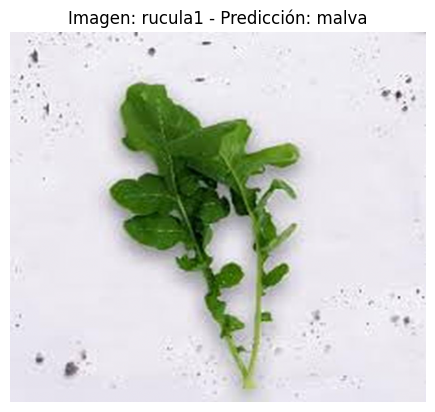

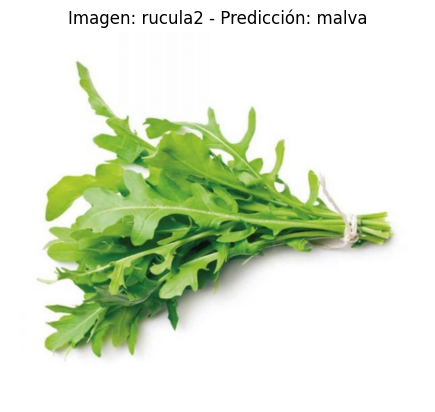

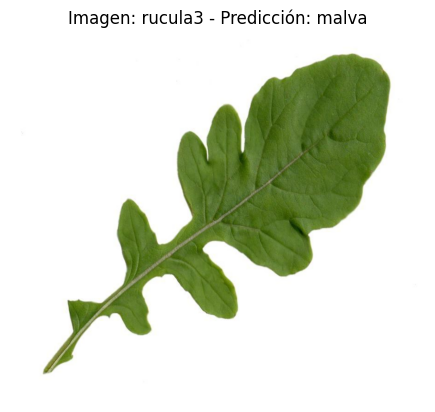

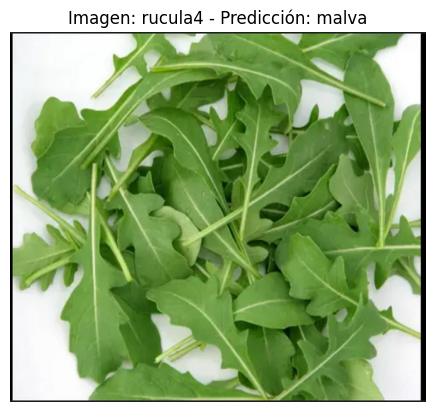

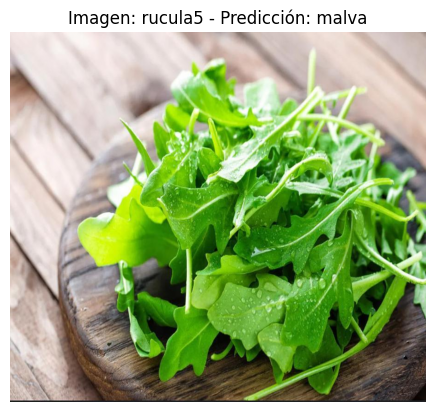

In [14]:
import torch
import numpy as np
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt

# Definir las etiquetas correspondientes
etiquetas = {
    0: 'albahaca',
    1: 'tomillo',
    2: 'malva',
    3: 'rucula',
    4: 'hinojo'
}

# Lista de nombres de imágenes
imagenes_nombres = [
    'hinojo1', 'hinojo2', 'hinojo3',
    'malva5',
    'rucula1', 'rucula2', 'rucula3', 'rucula4', 'rucula5'
]

# Ruta base de las imágenes
ruta_base = '/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/HojasSeparadas/dim/'

# Inicializar una lista para guardar los pares (imagen_tensor, etiqueta)
pares_imagen_etiqueta = []

# Cargar el modelo CNN entrenado
model = CNNModel()
model.load_state_dict(torch.load('/content/drive/MyDrive/INTELIGENCIA_ARTIFICIAL_SIS421/dataHojas/fullData/hojasCNN.pt'))
model.eval()

# Mover el modelo a la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for nombre_imagen in imagenes_nombres:
    # Crear la ruta completa de la imagen
    imagen_path = ruta_base + nombre_imagen + '.jpg'

    # Cargar la imagen
    imagen = Image.open(imagen_path)

    # Convertir la imagen a un array de NumPy
    imagen_array = np.array(imagen)

    # Normalizar la imagen (valores entre 0 y 1)
    imagen_normalizada = imagen_array / 255.0

    # Convertir la imagen a un tensor de PyTorch con dimensiones [canales, altura, anchura]
    imagen_tensor = torch.tensor(imagen_normalizada, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

    # Realizar la predicción
    with torch.no_grad():
        salida = model(imagen_tensor)
        prediccion = torch.argmax(salida, dim=1).item()

    # Mostrar la imagen
    plt.imshow(imagen_normalizada)
    plt.title(f'Imagen: {nombre_imagen} - Predicción: {etiquetas[prediccion]}')
    plt.axis('off')
    plt.show()

    # Guardar el par (imagen_tensor, prediccion)
    pares_imagen_etiqueta.append((imagen_tensor, prediccion))

# Ahora puedes trabajar con la lista pares_imagen_etiqueta que contiene cada imagen y su predicción